In [2]:
%pip install flask
%pip install nbformat importnb


[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 42.9/42.9 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
[ 9.9  19.71 12.77  5.18  3.76  0.88  2.48  1.9   2.4   3.9   5.3   5.93
  5.7   4.1   3.52  5.    5.71  5.95  5.61  7.89  0.3   1.6   1.6   0.7
  1.8   2.7   4.5   4.7   2.3   5.5  -0.9   3.3   3.81  3.01  2.18  1.9
 -0.9   0.18  0.67  1.07  0.7  -0.85  1.23  6.08  1.23]
[-7.6 -6.4 -7.4 -2.8 -7.2 -5.  -3.9  0.7 -0.6 -2.4 -3.3 -8.3 -7.5 -5.5
 -4.9 -5.4 -7.9 -7.9 -2.  12.7 10.2  9.2  7.   6.8  7.3  6.2 -4.   1.
  5.9  0.3  7.9  3.3  2.6 -1.2 -2.   2.9  6.9 10.5  9.6  5.6  7.   4.2
 -2.1 -3.5  1.4]
Epoch 1/80
6/6 [==============================] - 8s 8ms/step - loss: 9.5918
Epoch 2/80
6/6 [==============================] - 0s 6ms/step - loss: 8.5753
Epoch 3/80
6/6 [==============================] - 0s 8ms/step - loss: 7.3817
Epoch 4/80
6/6 [==============================] - 0s 6ms/step - loss: 6.0163
Epoch 5/80
6/6 [==============================] - 0s 7ms/step - loss: 4.5037
Epoch 6/80
6/6 [==============================]

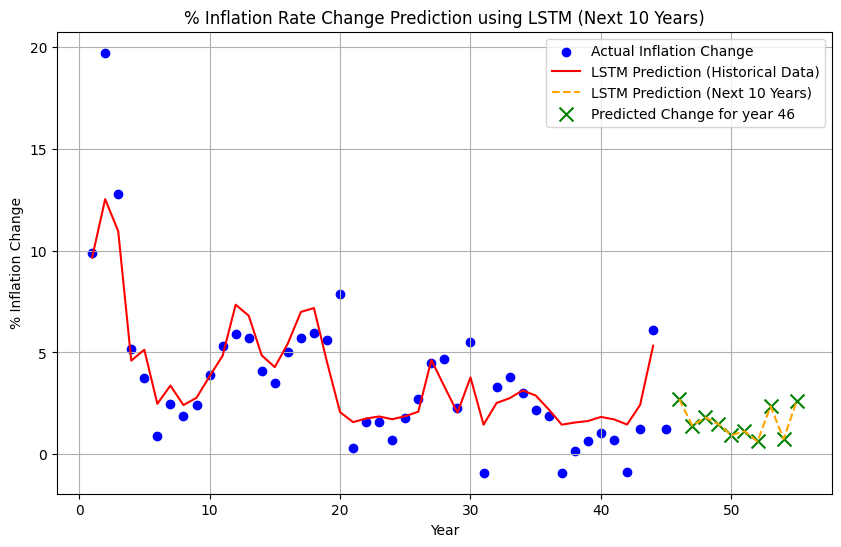

Mean Absolute Error (MAE): 1.68
Mean Squared Error (MSE): 3.71
Root Mean Squared Error (RMSE): 1.93
Accuracy: 95.56%
Shape mismatch: predicted_full (44) vs inflation_change_data (45)
[2.7087656129919986, 1.4091791008137386, 1.8126157924304185, 1.4846700931853944, 0.94253591812961, 1.1376812283549285, 0.6323530606854075, 2.359782453284205, 0.7561255715839228, 2.6098910457996296]
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [11/Oct/2024 15:56:45] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [11/Oct/2024 15:56:45] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [11/Oct/2024 15:58:33] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [11/Oct/2024 16:11:25] "POST /predict HTTP/1.1" 200 -


In [ ]:
from flask import Flask,request,jsonify
from importnb import Notebook # ใช้ importnb เพื่อ models .ipynb

# นำเข้า models.ipynb
with Notebook():
    import models  # ไฟล์ .ipynb จะถูก import โดยใช้ชื่อ model

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():

    # รับ input (จำนวนปีและจำนวนเงินเริ่มต้น) จาก request
    data = request.get_json()

    try:
        # แปลงค่า n_years และ initial_amount เป็น int
        n_years = int(data.get('n_years'))
        initial_amount = float(data.get('initial_amount'))
    except ValueError:
        return jsonify({'error': 'Invalid input. Ensure that n_years and initial_amount are integers.'}), 400

    # เรียกใช้ฟังก์ชันใน models.py เพื่อทำนายผล
    predictions = models.predict(n_years, initial_amount)

    # ส่งคืนผลลัพธ์กลับเป็น JSON
    return jsonify(predictions)

if __name__ == '__main__':
    app.run(debug=False)